In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read Cluster_1 and Cluster_2 sheets from file a.xlsx
a_file = 'Cluster_IDs_by_Group.xlsx'
cluster_1 = pd.read_excel(a_file, sheet_name='Cluster_1')
cluster_2 = pd.read_excel(a_file, sheet_name='Cluster_2')

# Add a new column 'cluster1?': 1 for Cluster_1, 0 for Cluster_2
cluster_1['cluster'] = 1
cluster_2['cluster'] = 2

# Read the entire data from file b.xlsx (assuming it has only one sheet)
b_file = 'BUSN Total Score Components.xlsx'
b_data = pd.read_excel(b_file)

# Strip column names (in case of hidden spaces)
cluster_1.columns = cluster_1.columns.str.strip()
cluster_2.columns = cluster_2.columns.str.strip()
b_data.columns = b_data.columns.str.strip()

# Perform left join using 'Individual LookupID' as the key
merged_cluster_1 = pd.merge(cluster_1, b_data, on='Individual LookupID', how='left')
merged_cluster_2 = pd.merge(cluster_2, b_data, on='Individual LookupID', how='left')

# Save the merged results into a new Excel file with two sheets
with pd.ExcelWriter('merged_output.xlsx') as writer:
    merged_cluster_1.to_excel(writer, sheet_name='Merged_Cluster_1', index=False)
    merged_cluster_2.to_excel(writer, sheet_name='Merged_Cluster_2', index=False)



In [3]:
merged_all = pd.concat([merged_cluster_1, merged_cluster_2], ignore_index=True)

In [4]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13825 entries, 0 to 13824
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Individual LookupID                   13825 non-null  int64  
 1   Gies Lifetime Giving as of 1/8/25     13825 non-null  float64
 2   Cumul Years of UI Giving              13825 non-null  int64  
 3   cluster                               13825 non-null  int64  
 4   Household ID                          13825 non-null  int64  
 5   BUSN Affiliation-Degree               13825 non-null  int64  
 6   BUSN Affiliation-Employment           13825 non-null  int64  
 7   BUSN Affiliation-Events               13825 non-null  int64  
 8   BUSN Affiliation-Interests            13825 non-null  int64  
 9   BUSN Affiliation-Student Involvement  13825 non-null  int64  
 10  BUSN Affiliation-Volunteer            13825 non-null  int64  
 11  Affiliation- BU

In [5]:
merged_all.describe()

,Individual LookupID,Gies Lifetime Giving as of 1/8/25,Cumul Years of UI Giving,cluster,Household ID,BUSN Affiliation-Degree,BUSN Affiliation-Employment,BUSN Affiliation-Events,BUSN Affiliation-Interests,BUSN Affiliation-Student Involvement,BUSN Affiliation-Volunteer,Affiliation- BUSN score minus giving
count,1.382500e+04,1.382500e+04,13825.000000,13825.000000,1.382500e+04,13825.000000,13825.000000,13825.000000,13825.000000,13825.000000,13825.000000,13825.000000
mean,1.156654e+07,7.599666e+03,7.926293,1.928680,1.279398e+07,522.083183,2.050633,7.623074,15.435371,15.479204,22.360940,585.028427
std,4.791663e+05,8.716771e+04,10.458091,0.257368,4.280997e+05,103.786809,23.025883,36.269661,62.922517,35.485483,150.424551,230.392096
min,1.030142e+07,0.000000e+00,0.000000,1.000000,1.209472e+07,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,1.140787e+07,0.000000e+00,0.000000,2.000000,1.243148e+07,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000
50%,1.147189e+07,1.500000e+01,3.000000,2.000000,1.277423e+07,500.000000,0.000000,0.000000,10.000000,0.000000,0.000000,511.000000
75%,1.173810e+07,4.500000e+02,12.000000,2.000000,1.312346e+07,500.000000,0.000000,0.000000,11.000000,0.000000,0.000000,561.000000
max,1.410190e+07,3.054886e+06,58.000000,2.000000,1.457330e+07,1500.000000,1100.000000,883.000000,1013.000000,600.000000,4720.000000,5888.000000


In [6]:
from scipy.stats import ttest_ind

# Split data by cluster1?
group1 = merged_cluster_1
group2 = merged_cluster_2

In [9]:
# List of sub-variables
sub_vars = ['BUSN Affiliation-Degree',
            'BUSN Affiliation-Employment',
            'BUSN Affiliation-Events',
            'BUSN Affiliation-Interests',
            'BUSN Affiliation-Student Involvement',
            'BUSN Affiliation-Volunteer']

# Perform t-tests
for var in sub_vars:
    stat, p = ttest_ind(group1[var], group2[var])
    print(f'{var}: t-stat={stat:.3f}, p-value={p:.3f}')


BUSN Affiliation-Degree: t-stat=29.416, p-value=0.000
BUSN Affiliation-Employment: t-stat=30.432, p-value=0.000
BUSN Affiliation-Events: t-stat=49.557, p-value=0.000
BUSN Affiliation-Interests: t-stat=6.343, p-value=0.000
BUSN Affiliation-Student Involvement: t-stat=0.268, p-value=0.789
BUSN Affiliation-Volunteer: t-stat=63.391, p-value=0.000


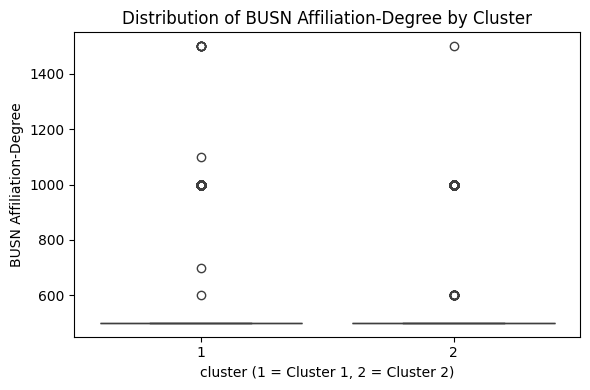

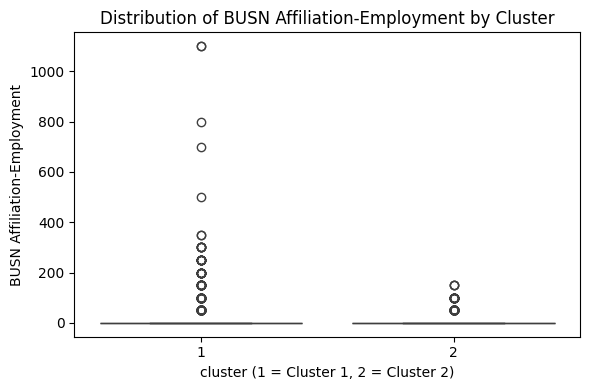

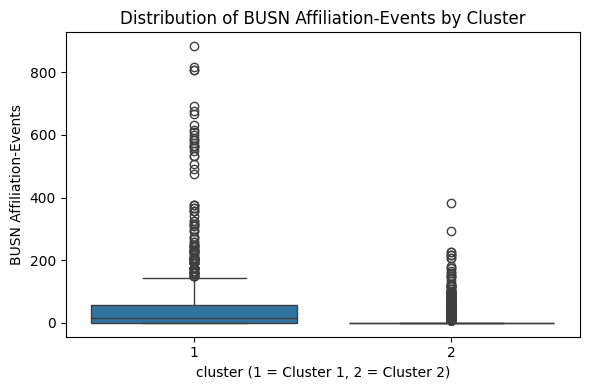

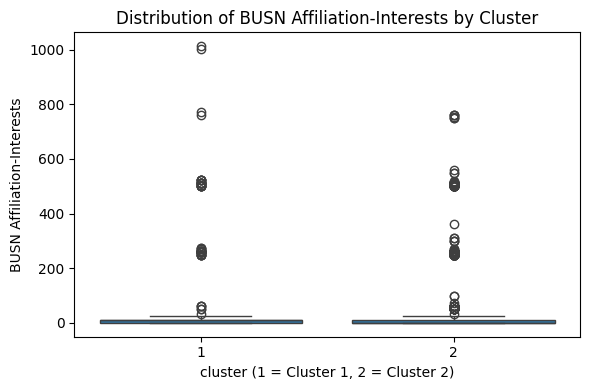

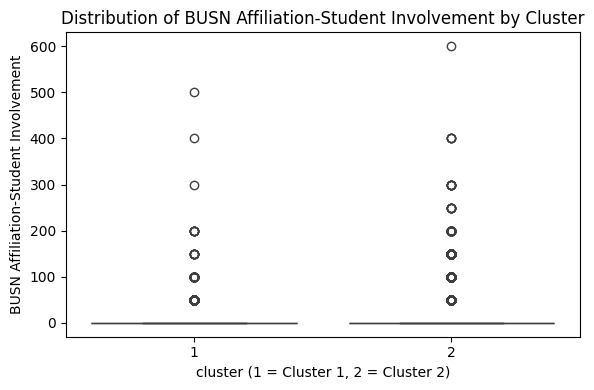

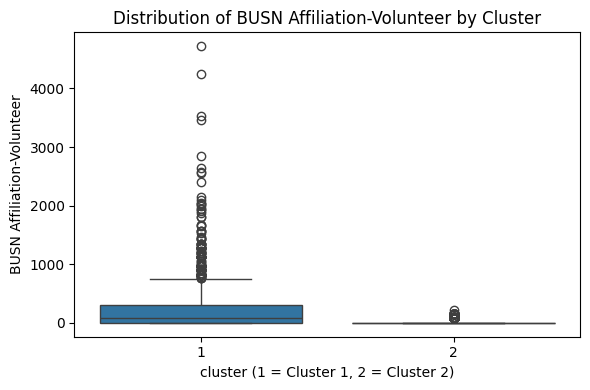

In [10]:
for var in sub_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=var, data=merged_all)
    plt.title(f'Distribution of {var} by Cluster')
    plt.xlabel('cluster (1 = Cluster 1, 2 = Cluster 2)')
    plt.tight_layout()
    plt.show()


In [11]:
mean_diff = group1[sub_vars].mean() - group2[sub_vars].mean()
total_diff = (group1['Affiliation- BUSN score minus giving'].mean() -
              group2['Affiliation- BUSN score minus giving'].mean())

contribution_ratio = mean_diff / total_diff
contribution_df = pd.DataFrame({
    'Mean Difference': mean_diff,
    'Contribution to Total Diff (%)': contribution_ratio * 100
})
print(contribution_df.sort_values(by='Contribution to Total Diff (%)', ascending=False))


                                      Mean Difference  \
BUSN Affiliation-Volunteer                 277.381350   
BUSN Affiliation-Degree                     97.879322   
BUSN Affiliation-Events                     54.737175   
BUSN Affiliation-Employment                 22.418434   
BUSN Affiliation-Interests                  13.171354   
BUSN Affiliation-Student Involvement         0.313980   

                                      Contribution to Total Diff (%)  
BUSN Affiliation-Volunteer                                 59.541360  
BUSN Affiliation-Degree                                    21.010309  
BUSN Affiliation-Events                                    11.749621  
BUSN Affiliation-Employment                                 4.812234  
BUSN Affiliation-Interests                                  2.827300  
BUSN Affiliation-Student Involvement                        0.067397  


KS-Test

In [15]:
from scipy.stats import ks_2samp
ks_stat, ks_p = ks_2samp(group1['Affiliation- BUSN score minus giving'], group2['Affiliation- BUSN score minus giving'])
print(f'Affiliation- BUSN score minus giving: KS-stat={ks_stat:.3f}, p-value={ks_p:.3f}')
for var in sub_vars:
    ks_stat, ks_p = ks_2samp(group1[var], group2[var])
    print(f'{var}: KS-stat={ks_stat:.3f}, p-value={ks_p:.3f}')


Affiliation- BUSN score minus giving: KS-stat=0.624, p-value=0.000
BUSN Affiliation-Degree: KS-stat=0.189, p-value=0.000
BUSN Affiliation-Employment: KS-stat=0.152, p-value=0.000
BUSN Affiliation-Events: KS-stat=0.525, p-value=0.000
BUSN Affiliation-Interests: KS-stat=0.187, p-value=0.000
BUSN Affiliation-Student Involvement: KS-stat=0.005, p-value=1.000
BUSN Affiliation-Volunteer: KS-stat=0.693, p-value=0.000


In [13]:
from scipy.stats import wasserstein_distance
wd = wasserstein_distance(group1['Affiliation- BUSN score minus giving'], group2['Affiliation- BUSN score minus giving'])
print(f'Affiliation- BUSN score minus giving: Wasserstein Distance = {wd:.3f}')
for var in sub_vars:
    wd = wasserstein_distance(group1[var], group2[var])
    print(f'{var}: Wasserstein Distance = {wd:.3f}')


Affiliation- BUSN score minus giving: Wasserstein Distance = 465.863
BUSN Affiliation-Degree: Wasserstein Distance = 97.879
BUSN Affiliation-Employment: Wasserstein Distance = 22.418
BUSN Affiliation-Events: Wasserstein Distance = 54.737
BUSN Affiliation-Interests: Wasserstein Distance = 13.171
BUSN Affiliation-Student Involvement: Wasserstein Distance = 1.014
BUSN Affiliation-Volunteer: Wasserstein Distance = 277.381


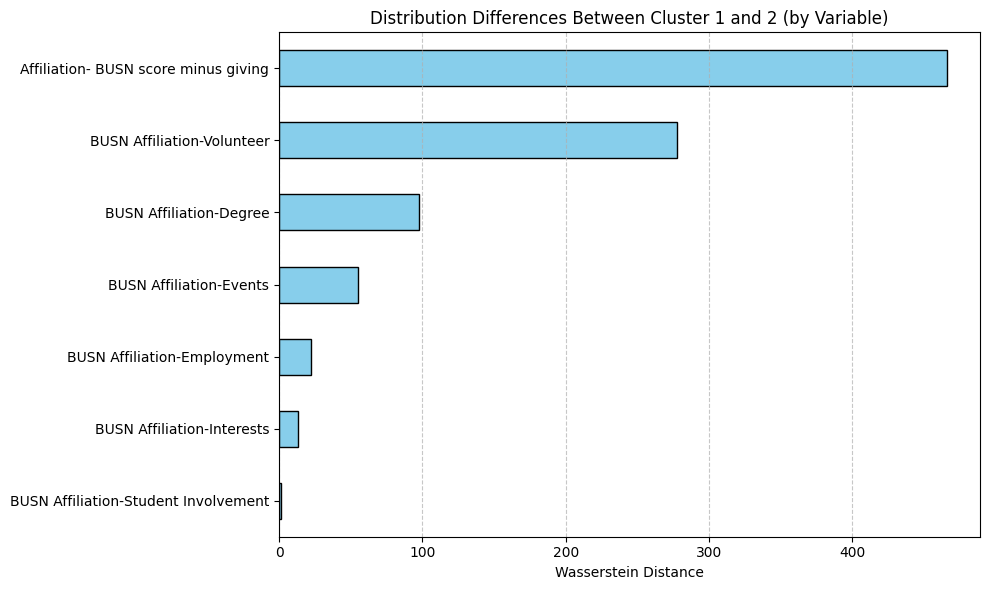

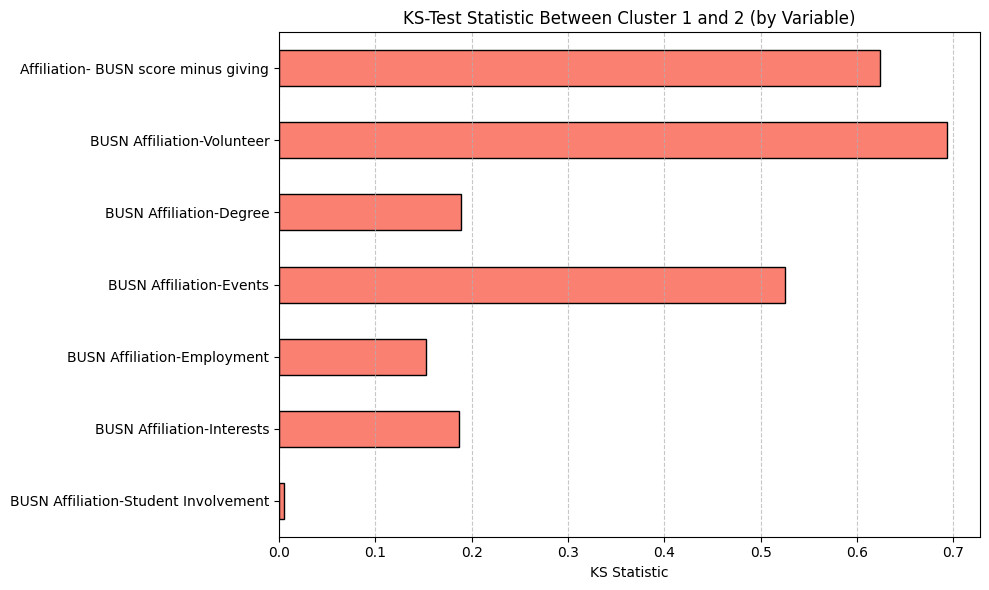

In [14]:
# Updated input data (KS and Wasserstein statistics for each BUSN variable)
ks_stats = {
    'Affiliation- BUSN score minus giving': 0.624,
    'BUSN Affiliation-Degree': 0.189,
    'BUSN Affiliation-Employment': 0.152,
    'BUSN Affiliation-Events': 0.525,
    'BUSN Affiliation-Interests': 0.187,
    'BUSN Affiliation-Student Involvement': 0.005,
    'BUSN Affiliation-Volunteer': 0.693
}

wasserstein_stats = {
    'Affiliation- BUSN score minus giving': 465.863,
    'BUSN Affiliation-Degree': 97.879,
    'BUSN Affiliation-Employment': 22.418,
    'BUSN Affiliation-Events': 54.737,
    'BUSN Affiliation-Interests': 13.171,
    'BUSN Affiliation-Student Involvement': 1.014,
    'BUSN Affiliation-Volunteer': 277.381
}

# Create a DataFrame from the dictionaries
df_diff = pd.DataFrame({
    'KS Statistic': ks_stats,
    'Wasserstein Distance': wasserstein_stats
})

# Sort the DataFrame by Wasserstein Distance for visual clarity
df_diff = df_diff.sort_values(by='Wasserstein Distance', ascending=False)

# Plot the Wasserstein Distance bar chart
plt.figure(figsize=(10, 6))
df_diff['Wasserstein Distance'].plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Wasserstein Distance')
plt.title('Distribution Differences Between Cluster 1 and 2 (by Variable)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Plot the KS Statistic bar chart
plt.figure(figsize=(10, 6))
df_diff['KS Statistic'].plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('KS Statistic')
plt.title('KS-Test Statistic Between Cluster 1 and 2 (by Variable)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
